<a href="https://colab.research.google.com/github/ar851060/palm_detection_prediction/blob/main/CCBDA_final_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enabling GPU on Colab

Need to enable GPU from Notebook settings

- Navigate to Edit-Notebook settings menu
- Select GPU from the Hardware Accelerator dropdown list


In [ ]:
import torch

if not torch.cuda.is_available():
  raise Exception("GPU not availalbe. CPU training will be too slow.")

print("device name", torch.cuda.get_device_name(0))

device name Tesla P100-PCIE-16GB


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import helper
import cv2
import re
import os
from tqdm.auto import tqdm
from itertools import cycle
import math

In [ ]:
# !unzip /content/drive/Shareddrives/CCBDA_final/【診斷結果】全備份/0000.zip
# !unzip /content/drive/Shareddrives/CCBDA_final/【診斷結果】全備份/0200.zip
# !unzip /content/drive/Shareddrives/CCBDA_final/【診斷結果】全備份/0400.zip
# !unzip /content/drive/Shareddrives/CCBDA_final/【診斷結果】全備份/0600.zip
# !unzip /content/drive/Shareddrives/CCBDA_final/【診斷結果】全備份/0800.zip
# !unzip /content/drive/Shareddrives/CCBDA_final/【診斷結果】全備份/1000.zip
# !unzip /content/drive/Shareddrives/CCBDA_final/【診斷結果】全備份/1200.zip
# !unzip /content/drive/Shareddrives/CCBDA_final/【診斷結果】全備份/1400.zip

In [ ]:
# def getImage(idx, files):
#   images = []
#   imageNumber = []
#   if idx < 4:
#     folder = "/content/pytorch-unet/0"+str(idx)+"00"
#     for subfolder in os.listdir(folder):
#       match = re.compile(u'[\u4e00-\u9fa5]+').search(subfolder)
#       if match:
#         num = re.findall('[0-9]+', subfolder)[0]
#         if int(num) == 100: continue
#         folder2 = folder + "/" + subfolder + "/Attachments"
#         for filename in os.listdir(folder2):
#           if "01" not in filename and "02" not in filename and "八卦" not in filename:
#             img = cv2.imread(os.path.join(folder2,filename))
#             if img is not None and num not in files:
#                 img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
#                 images.append(img)
#                 imageNumber.append(num)
#   else:
#     if idx < 10:
#       folder = "/content/pytorch-unet/0"+str(idx)+"00"
#     else:
#       folder = "/content/pytorch-unet/"+str(idx)+"00"
#     for subfolder in os.listdir(folder):
#       match = re.compile(u'[\u4e00-\u9fa5]+').search(subfolder)
#       if match:
#         num = re.findall('[0-9]+', subfolder)[0]
#         folder2 = folder + "/" + subfolder + "/Attachments"
#         for filename in os.listdir(folder2):
#           match = re.compile(u'[\u4e00-\u9fa5]+').search(filename)
#           if "03." in filename:
#             img = cv2.imread(os.path.join(folder2,filename))
#             if img is not None and num not in files:
#                 img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
#                 images.append(img)
#                 imageNumber.append(num)
#   return images, imageNumber

In [ ]:
def img_to_array(img):
  return np.array(img)

def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


In [ ]:


# # defining the size of image 
# SIZE = 512

# image_path = '/content/drive/Shareddrives/CCBDA_final/LinePlot/orig'
# img_array = []

# sketch_path = '/content/drive/Shareddrives/CCBDA_final/LinePlot/one'
# sketch_array = []

# image_file = sorted_alphanumeric(os.listdir(image_path))
# sketch_file = sorted_alphanumeric(os.listdir(sketch_path))
# sketch_file = [re.findall("[0-9BG]+",x)[0] for x in sketch_file]
# image_file = [re.findall("[0-9BG]+",x)[0] for x in image_file if re.findall("[0-9BG]+",x)]
# files = list(set(image_file) & set(sketch_file))
# sketch_file = [x+".png" for x in files]
# image_file = [x+".png" for x in files]

In [ ]:
# for idx in range(0,15,2):
#   print(idx)
#   img, name = getImage(idx,files)
#   n = len(name)
#   for jdx in tqdm(range(n)):
#     # image = cv2.cvtColor(img[jdx], cv2.COLOR_BGR2RGB)
#     # image = image.astype('float32') / 255.0
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/unlabeled/'+name[jdx]+'.png', img[jdx])
    

In [ ]:

# for i in tqdm(image_file):
#     image = cv2.imread(image_path + '/' + i,1)
    
#     # as opencv load image in bgr format converting it to rgb
#     # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     # resizing images 
#     image = cv2.resize(image, (SIZE, SIZE))
#     # image = 255-image
#     # normalizing image 
#     # image = image.astype('float32') / 255.0
    
#     #appending normal normal image
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/1_'+ i, image)   
#     img_array.append(img_to_array(image))
#     # Image Augmentation
    
#     # horizontal flip 
#     img1 = cv2.flip(image,1)
#     img_array.append(img_to_array(img1))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/2_'+ i, img1)  
#     #vertical flip 
#     img2 = cv2.flip(image,-1)
#     img_array.append(img_to_array(img2))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/3_'+ i, img2)
#     #vertical flip 
#     img3 = cv2.flip(image,-1)
#     # horizontal flip
#     img3 = cv2.flip(img3,1)
#     img_array.append(img_to_array(img3))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/4_'+ i, img3)
#     # rotate clockwise 
#     img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
#     img_array.append(img_to_array(img4))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/5_'+ i, img4)
#     # flip rotated image 
#     img5 = cv2.flip(img4,1)
#     img_array.append(img_to_array(img5))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/6_'+ i, img5)
#      # rotate anti clockwise 
#     img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
#     img_array.append(img_to_array(img6))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/7_'+ i, img6)
#     # flip rotated image 
#     img7 = cv2.flip(img6,1)
#     img_array.append(img_to_array(img7))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/8_'+ i, img7)
  
    
# for i in tqdm(sketch_file):
#     image = cv2.imread(sketch_path + '/' + i,1)
    
#     # as opencv load image in bgr format converting it to rgb
#     # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     # resizing images 
#     image = cv2.resize(image, (SIZE, SIZE))
#     image[np.where((image==[0, 0, 0]).all(axis=2))] = [255, 255, 255]
#     # image = 255-image
#     # normalizing image 
#     # image = image.astype('float32') / 255.0
#     # appending normal sketch image
#     sketch_array.append(img_to_array(image))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/target/1_'+i, image)
    
#     #Image Augmentation
#     # horizontal flip 
#     img1 = cv2.flip(image,1)
#     sketch_array.append(img_to_array(img1))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/target/2_'+ i, img1)
#      #vertical flip 
#     img2 = cv2.flip(image,-1)
#     sketch_array.append(img_to_array(img2))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/target/3_'+ i, img2)
#      #vertical flip 
#     img3 = cv2.flip(image,-1)
#     # horizontal flip
#     img3 = cv2.flip(img3,1)
#     sketch_array.append(img_to_array(img3))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/target/4_'+ i, img3)
#     # rotate clockwise 
#     img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
#     sketch_array.append(img_to_array(img4))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/target/5_'+ i, img4)
#     # flip rotated image 
#     img5 = cv2.flip(img4,1)
#     sketch_array.append(img_to_array(img5))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/target/6_'+ i, img5)
#      # rotate anti clockwise 
#     img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
#     sketch_array.append(img_to_array(img6))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/target/7_'+ i, img6)
#     # flip rotated image 
#     img7 = cv2.flip(img6,1)
#     sketch_array.append(img_to_array(img7))
#     cv2.imwrite('/content/drive/Shareddrives/CCBDA_final/Drawing/target/8_'+ i, img7)

In [ ]:
# import os
 
# file_source = "/content/drive/Shareddrives/CCBDA_final/Drawing/inputs"
# file_destination = '/content/drive/Shareddrives/CCBDA_final/Drawing/eval'
# file_source2 = "/content/drive/Shareddrives/CCBDA_final/Drawing/target"
# get_files = os.listdir(file_source)
# mask_files = os.listdir(file_source2)
 
# for g in get_files[:100]:
#     os.replace(file_source+"/" + g, file_destination +"/inputs/" + g)
#     os.replace(file_source2 +"/" + g[:-4]+"_mask.png", file_destination +"/target/" + g[:-4]+"_mask.png")


## Prepare Dataset and DataLoader

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

class SimDataset(Dataset):
  def __init__(self, input, target = None, transform=None, transform_mask=None, unlabeled = False):
    if unlabeled:
      self.target_path = None
      self.target_masks = None
    else:
      self.target_path = target
      self.target_masks = sorted_alphanumeric(os.listdir(self.target_path))
    self.input_path = input
    self.input_images = sorted_alphanumeric(os.listdir(self.input_path))
    self.transform = transform
    self.transform_mask = transform_mask
    self.unlabeled = unlabeled

  def __len__(self):
    
    return len(self.input_images)

  def __getitem__(self, idx):
    image = cv2.imread(self.input_path+self.input_images[idx])
    image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float32') / 255.0
    if self.transform:
      image = self.transform(image)

    if not self.unlabeled:
      mask = cv2.imread(self.target_path+self.target_masks[idx])
      mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_AREA)
      mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
      mask = mask.astype('float32') / 255.0
      if self.transform_mask:
        mask = self.transform_mask(mask)
      return image, mask
    else:
      return image

# use the same transformations for train/val in this example
trans = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]), # imagenet
])

trans_mask = transforms.Compose([
  transforms.ToTensor(),
  transforms.Grayscale()
])


# input_list = input_images[:1800]
# target_list = target_masks[:1800]

input_path = "/content/drive/Shareddrives/CCBDA_final/Drawing/inputs/"
target_path = "/content/drive/Shareddrives/CCBDA_final/Drawing/target/"
eval_path = "/content/drive/Shareddrives/CCBDA_final/Drawing/eval/inputs/"
eval_target = "/content/drive/Shareddrives/CCBDA_final/Drawing/eval/target/"
unlabeled_path = "/content/drive/Shareddrives/CCBDA_final/Drawing/unlabeled/"

train_set = SimDataset(input_path, target = target_path, transform = trans, transform_mask = trans_mask)
unlabeled_set = SimDataset(unlabeled_path, transform = trans, unlabeled = True)
val_set = SimDataset(eval_path,target = eval_target, transform = trans, transform_mask = trans_mask)

image_datasets = {
  'train': train_set, 'val': val_set, 'unlabeled': unlabeled_set
}

batch_size = 16

dataloaders = {
  'train': DataLoader(train_set, batch_size = batch_size, shuffle=True),
  'val': DataLoader(val_set, batch_size=batch_size, shuffle=True),
  'unlabeled': DataLoader(unlabeled_set, batch_size = 1, shuffle = True),
  'pseudo': None
}

In [ ]:
class PseudoDataset(Dataset):
  def __init__(self, input, target, transform=None, transform_mask=None):
    
    self.target_masks = target
    self.input_images = input
    self.transform = transform
    self.transform_mask = transform_mask

  def __len__(self):
    
    return len(self.input_images)

  def __getitem__(self, idx):
    image = self.input_images[idx]
    mask = self.target_masks[idx]
    if self.transform:
      image = self.transform(image)
    if self.transform_mask:
      mask = self.transform_mask(mask)
    return image, mask

## Check the outputs from DataLoader

torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])


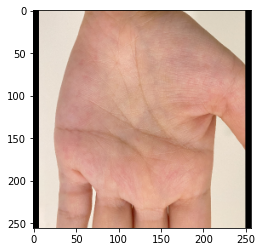

In [ ]:
def reverse_transform(inp):
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.5, 0.5, 0.5])
  std = np.array([0.5, 0.5, 0.5])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  # inp = (inp * 255).astype(np.uint8)

  return inp

def reverse_transform_mask(inp):
  inp = inp.numpy().transpose((1, 2, 0))
  inp = np.clip(inp, 0, 1)
  # inp = (inp * 255).astype(np.uint8)

  return inp

# Get a batch of training data
inputs, label = next(iter(dataloaders['val']))

print(inputs.shape, label.shape)
plt.imshow(reverse_transform(inputs[0]))


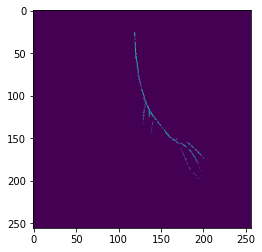

In [ ]:
plt.imshow(np.squeeze(reverse_transform_mask(label[0]),axis = 2))

# Define a UNet module

In [ ]:
import torch.nn as nn
import torchvision.models


def convrelu(in_channels, out_channels, kernel, padding):
  return nn.Sequential(
    nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
    nn.ReLU(inplace=True),
    nn.BatchNorm2d(out_channels)
  )


class ResNetUNet(nn.Module):
  def __init__(self, n_class):
    super().__init__()

    self.base_model = torchvision.models.resnet18(pretrained=True)
    self.base_layers = list(self.base_model.children())

    self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
    self.layer0_1x1 = convrelu(64, 64, 1, 0)
    self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 64, x.H/4, x.W/4)
    self.layer1_1x1 = convrelu(64, 64, 1, 0)
    self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)
    self.layer2_1x1 = convrelu(128, 128, 1, 0)
    self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)
    self.layer3_1x1 = convrelu(256, 256, 1, 0)
    self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)
    self.layer4_1x1 = convrelu(512, 512, 1, 0)

    self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
    self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
    self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
    self.conv_up0 = convrelu(64 + 256, 128, 3, 1)

    self.conv_original_size0 = convrelu(3, 64, 3, 1)
    self.conv_original_size1 = convrelu(64, 64, 3, 1)
    self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)

    self.conv_last = nn.Conv2d(64, n_class, 1)


  def forward(self, input):
    input = input.float()

    x_original = self.conv_original_size0(input)
    x_original = self.conv_original_size1(x_original)

    layer0 = self.layer0(input)
    layer1 = self.layer1(layer0)
    layer2 = self.layer2(layer1)
    layer3 = self.layer3(layer2)
    layer4 = self.layer4(layer3)

    layer4 = self.layer4_1x1(layer4)
    x = self.upsample(layer4)
    layer3 = self.layer3_1x1(layer3)
    x = torch.cat([x, layer3], dim=1)
    x = self.conv_up3(x)

    x = self.upsample(x)
    layer2 = self.layer2_1x1(layer2)
    x = torch.cat([x, layer2], dim=1)
    x = self.conv_up2(x)

    x = self.upsample(x)
    layer1 = self.layer1_1x1(layer1)
    x = torch.cat([x, layer1], dim=1)
    x = self.conv_up1(x)

    x = self.upsample(x)
    layer0 = self.layer0_1x1(layer0)
    x = torch.cat([x, layer0], dim=1)
    x = self.conv_up0(x)

    x = self.upsample(x)
    x = torch.cat([x, x_original], dim=1)
    x = self.conv_original_size2(x)

    out = self.conv_last(x)

    return out

## Instantiate the UNet model

- Move the model to GPU if available
- Show model summaries

In [ ]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device', device)

# model = EffUNet(1)
model = ResNetUNet(1)
model = model.to(device)

device cuda


In [ ]:
from torchsummary import summary
summary(model, input_size=(3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
       BatchNorm2d-3         [-1, 64, 256, 256]             128
            Conv2d-4         [-1, 64, 256, 256]          36,928
              ReLU-5         [-1, 64, 256, 256]               0
       BatchNorm2d-6         [-1, 64, 256, 256]             128
            Conv2d-7         [-1, 64, 128, 128]           9,408
            Conv2d-8         [-1, 64, 128, 128]           9,408
       BatchNorm2d-9         [-1, 64, 128, 128]             128
      BatchNorm2d-10         [-1, 64, 128, 128]             128
             ReLU-11         [-1, 64, 128, 128]               0
             ReLU-12         [-1, 64, 128, 128]               0
        MaxPool2d-13           [-1, 64, 64, 64]               0
        MaxPool2d-14           [-1, 64,

# Define the main training loop

In [ ]:
from collections import defaultdict
import torch.nn.functional as F

checkpoint_path = "/content/checkpoint.pth"

def dice_loss(pred, target, smooth = 1e-5):
    pred = pred.contiguous()
    target = target.contiguous()    

    intersection = (pred * target).sum(dim=2).sum(dim=2)
    
    loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))
    
    return loss.mean()

def calc_loss(pred, target, metrics, bce_weight=0.4):
     
    bce = F.binary_cross_entropy_with_logits(pred, target)

    pred = torch.sigmoid(pred)
    dice = dice_loss(pred, target)

    loss = bce * bce_weight + dice * (1 - bce_weight)

    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)

    return loss

def print_metrics(metrics, epoch_samples, phase):
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))

    print("{}: {}".format(phase, ", ".join(outputs)))

In [ ]:
def training(model, optimizer,dataloaders, scheduler):
  model.train()

  metrics = defaultdict(float)
  epoch_samples = 0
  
  phase = "train"

  for iter_num, (inputs, labels) in enumerate(dataloaders[phase]):
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = calc_loss(outputs, labels, metrics)
    loss.backward()
    optimizer.step()
      
    epoch_samples += inputs.size(0)
  
  phase = 'pseudo'

  if dataloaders[phase]:
    for iter_num, (inputs, labels) in enumerate(dataloaders[phase]):
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = calc_loss(outputs, labels, metrics)
      loss.backward()
      optimizer.step()
        
      epoch_samples += inputs.size(0)


  print_metrics(metrics, epoch_samples, phase)
  epoch_loss = metrics['loss'] / epoch_samples
  scheduler.step()  
    
  for param_group in optimizer.param_groups:
      print("LR", param_group['lr'])
  
  return model, optimizer
  


def testing(model, optimizer,dataloaders, best_loss):
  phase = "val"

  model.eval()
  metrics = defaultdict(float)
  epoch_samples = 0

  for inputs, labels in dataloaders[phase]:
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = calc_loss(outputs, labels, metrics)

    epoch_samples += inputs.size(0)
  
  print_metrics(metrics, epoch_samples, phase)
  epoch_loss = metrics['loss'] / epoch_samples

  if epoch_loss < best_loss:
    print(f"saving best model to {checkpoint_path}")
    best_loss = epoch_loss
    torch.save(model.state_dict(), checkpoint_path)
  
  return best_loss

def unlabeled(model,dataloaders):
  
  model.eval()  
  phase = 'unlabeled'
  
  pseudo_inputs = torch.empty(1,3,256,256).to(device)
  pseudo_outputs = torch.empty(1,3,256,256).to(device)

  for inputs in dataloaders[phase]:
    inputs = inputs.to(device)
    pred = model(inputs)
    pred = torch.cat([pred, pred, pred], dim=1) 
    pred = torch.sigmoid(pred).data
    pred = (pred > 0.7).float()
    if torch.max(pred) != 0.0:
      pseudo_inputs = torch.cat((pseudo_inputs, inputs), dim = 0)
      pseudo_outputs = torch.cat((pseudo_outputs, pred), dim = 0)

  pseudo_inputlist = np.asarray([reverse_transform(x) for x in pseudo_inputs[1:,:,:,:].cpu()])
  pseudo_outputlist = np.asarray([reverse_transform_mask(x) for x in pseudo_outputs[1:,:,:,:].cpu()])


  return pseudo_inputlist, pseudo_outputlist


## Training

In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time

num_epochs = 100

num_class = 1
model = ResNetUNet(num_class).to(device)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = num_epochs)
scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)



best_loss = 1e10

for epoch in range(num_epochs):
  since = time.time()
  print("\n")
  print('Epoch {}/{}'.format(epoch+1, num_epochs))
  print('-' * 10)

  model, optimizer = training(model, optimizer, dataloaders, scheduler)
  best_loss = testing(model, optimizer, dataloaders, best_loss)
  if epoch > 10:
    pseudo_inputs, pseudo_outputs = unlabeled(model, dataloaders)

    if pseudo_inputs.shape[0] == 0:
      print("no pseudo")
      dataloaders["pseudo"] = None
      continue
    indices = torch.randperm(pseudo_outputs.shape[0])[:10]
    indices = indices[:int(len(indices)*0.8)]
    pseudo_inputs = pseudo_inputs[indices]
    pseudo_outputs = pseudo_outputs[indices]
    pseudo_set = PseudoDataset(pseudo_inputs, pseudo_outputs, transform = trans, transform_mask = trans_mask)
    dataloaders["pseudo"] = DataLoader(pseudo_set, batch_size = batch_size, shuffle=True)

  time_elapsed = time.time() - since
  print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

print('Best val loss: {:4f}'.format(best_loss))



Epoch 1/100
----------
pseudo: bce: 0.696615, dice: 0.988739, loss: 0.871889
LR 0.0001
val: bce: 0.682057, dice: 0.989276, loss: 0.866388
saving best model to /content/checkpoint.pth
1m 3s


Epoch 2/100
----------
pseudo: bce: 0.663898, dice: 0.987319, loss: 0.857951
LR 0.0001
val: bce: 0.638016, dice: 0.988547, loss: 0.848334
saving best model to /content/checkpoint.pth
1m 5s


Epoch 3/100
----------
pseudo: bce: 0.621101, dice: 0.986234, loss: 0.840181
LR 0.0001
val: bce: 0.608234, dice: 0.988152, loss: 0.836185
saving best model to /content/checkpoint.pth
1m 3s


Epoch 4/100
----------
pseudo: bce: 0.566932, dice: 0.985272, loss: 0.817936
LR 0.0001
val: bce: 0.544200, dice: 0.986677, loss: 0.809686
saving best model to /content/checkpoint.pth
1m 3s


Epoch 5/100
----------
pseudo: bce: 0.505747, dice: 0.984369, loss: 0.792920
LR 0.0001
val: bce: 0.470059, dice: 0.986075, loss: 0.779669
saving best model to /content/checkpoint.pth
1m 4s


Epoch 6/100
----------
pseudo: bce: 0.44171

In [ ]:
# import torch
# import torch.optim as optim
# from torch.optim import lr_scheduler
# import time

# num_class = 1
# model = ResNetUNet(num_class).to(device)
# # model = UNet(num_class).to(device)
# # model2 = ResNetUNet(num_class).to(device)

# # freeze backbone layers
# # for l in model.base_layers:
# #   for param in l.parameters():
# #     param.requires_grad =True

# optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)
# # optimizer2 = optim.Adam(filter(lambda p: p.requires_grad, model2.parameters()), lr=0.0001)

# # optimizer_ft = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)



# # scheduler1 = lr_scheduler.ReduceLROnPlateau(optimizer1, 'min', patience=5, verbose=True)
# # scheduler2 = lr_scheduler.ReduceLROnPlateau(optimizer2, 'min', patience=5, verbose=True)

# # num_iter = 10 # max(len(dataloaders['train']), len(dataloaders['unlabeled'])) #900
# # num_epochs = 10 # 100

# scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=100, gamma=0.1)
# # scheduler2 = lr_scheduler.StepLR(optimizer2, step_size=100, gamma=0.1)


# model = train_model(model, optimizer_ft, scheduler, num_epochs=10)

## Predict new images using the trained model

In [ ]:
import math
model = ResNetUNet(num_class).to(device)
model.load_state_dict(torch.load(checkpoint_path))

model.eval()   
test_loader = dataloaders['val']

inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)
labels = labels.to(device)
print('inputs.shape', inputs.shape)
print('labels.shape', labels.shape)

# Predict
pred = model(inputs)
# The loss functions include the sigmoid function.
pred = torch.sigmoid(pred)
pred = pred.data.cpu().numpy()
print('pred.shape', pred.shape)

# Change channel-order and make 3 channels for matplot
input_images_rgb = [reverse_transform(x) for x in inputs.cpu()]

# Map each channel (i.e. class) to each color
target_masks_rgb = [x.transpose((1, 2, 0)) for x in labels.cpu().numpy()]
pred_rgb = [x.transpose((1, 2, 0)) for x in pred]

inputs.shape torch.Size([16, 3, 256, 256])
labels.shape torch.Size([16, 1, 256, 256])
pred.shape (16, 1, 256, 256)


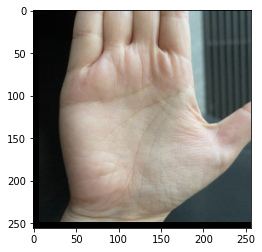

In [ ]:
plt.imshow(input_images_rgb[4])

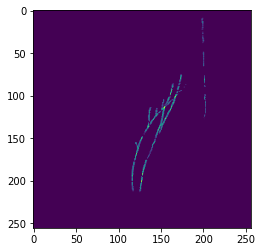

In [ ]:
plt.imshow(target_masks_rgb[4][:,:,0])

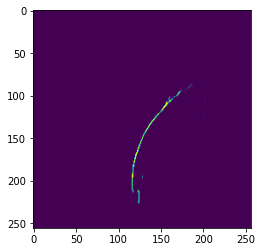

In [ ]:
plt.imshow(pred_rgb[4][:,:,0])

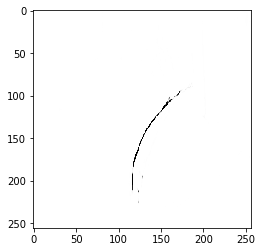

In [ ]:
plt.imshow(pred_rgb[4][:,:,0], cmap='Greys',  interpolation='nearest')

In [ ]:
all_path = "/content/drive/Shareddrives/CCBDA_final/allHands/"
all_set = SimDataset(all_path, transform = trans, unlabeled = True)
all_files = sorted_alphanumeric(os.listdir(all_path))
batch_size = 16

all_dataloader = DataLoader(all_set, batch_size = batch_size, shuffle = False)


In [ ]:
checkpoint_path = "/content/drive/Shareddrives/CCBDA_final/checkpoint.pth"
model = ResNetUNet(1).to(device)
model.load_state_dict(torch.load(checkpoint_path))

model.eval()  

idx = 0

for inputs in tqdm(all_dataloader):
  inputs = inputs.to(device)
  pred = model(inputs)
  pred = torch.sigmoid(pred)
  pred = pred.data.cpu().numpy()
  for line in pred:
    name = all_files[idx]
    line = line.transpose((1,2,0))[:,:,0]
    line = (line*255.0).astype(int)
    cv2.imwrite("/content/drive/Shareddrives/CCBDA_final/allLines/"+name, line)
    idx+=1

  0%|          | 0/91 [00:00<?, ?it/s]

In [ ]:
all_files[idx-1]

'1504_1.png'

In [ ]:
pred.shape

(16, 1, 256, 256)

In [ ]:
for x in pred:
  print(x.shape)

(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
(1, 256, 256)
